In [6]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="darkgrid", font='Verdana', color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

---

In [7]:
# Using a custom function to utilize pytrends to get me the interest index
## From Google Trends Pseudo-API over a specified period of time
### Timeframe format --> 'YYYY-MM-DD YYYY-MM-DD' --> 'early recent'
# This one got '2000-01-01 current_date'
# indoor_farming = get_int('indoor farming', '2000-01-01 2020-05-16')
# Saving this data
# indoor_farming_int.to_csv('indoor_farming_interest')

# Saved the csv before
indoor_farming = pd.read_csv('indoor_farming_interest')
indoor_farming['date'] = pd.to_datetime(indoor_farming['date'])
indoor_farming.set_index('date', inplace=True)

Going to build a `pytrends` payload for the term **indoor farming** and return some of the related topics.

In [8]:
pytrends.build_payload(['indoor farming'], geo='US')

In [35]:
pytrends.related_topics()

{'indoor farming': {'rising':     value formattedValue                                               link  \
  0   99400       Breakout  /trends/explore?q=/g/11c5sr5trf&date=today+5-y...   
  1   83900       Breakout  /trends/explore?q=/m/03fp41&date=today+5-y&geo=US   
  2   77550       Breakout  /trends/explore?q=/m/09y4pm&date=today+5-y&geo=US   
  3   77550       Breakout  /trends/explore?q=/m/0642w22&date=today+5-y&ge...   
  4   77450       Breakout   /trends/explore?q=/m/0fqlj&date=today+5-y&geo=US   
  5   66300       Breakout   /trends/explore?q=/m/09dv7&date=today+5-y&geo=US   
  6   66250       Breakout   /trends/explore?q=/m/03rnh&date=today+5-y&geo=US   
  7   66050       Breakout  /trends/explore?q=/m/015n_w&date=today+5-y&geo=US   
  8   55350       Breakout  /trends/explore?q=/m/04n7m2q&date=today+5-y&ge...   
  9   46650       Breakout    /trends/explore?q=/m/0t8t&date=today+5-y&geo=US   
  10  46400       Breakout  /trends/explore?q=/m/03b848&date=today+5-y&geo=US   


Gathering data on related topics to indoor farming. The goal is to average all of the values together to get a topic wide understanding of the trends.  
  
I will be using the `get_int()` function from before to gather the data, and then save it into a csv for future use.

In [9]:
greenhouse_int = get_int('greenhouse', '2000-01-01 2020-05-16')

In [8]:
greenhouse_int.to_csv('greenhouse.csv')

In [ ]:
greenhouse = pd.read_csv('greenhouse.csv')
greenhouse['date'] = pd.to_datetime(greenhouse['date'])
greenhouse.set_index('date', inplace=True)



In [10]:
hydroponics_int = get_int('hydroponic','2000-01-01 2020-05-16')
# hydroponics_int.to_csv('hydroponics.csv')

In [11]:
vfarm_int = get_int('vertical farming', '2000-01-01 2020-05-16')
# vfarm_int.to_csv('final_vfarm.csv')

In [12]:
urban_int = get_int('urban agriculture', '2000-01-01 2020-05-16')
# urban_int.to_csv('urban_final.csv')

In [13]:
aeroponics_int = get_int('aeroponics', '2000-01-01 2020-05-16')
# aeroponics_int.to_csv('aeroponics.csv')

In [59]:
greenhouse_int = pd.read_csv('greenhouse.csv')
greenhouse_int['date'] = pd.to_datetime(greenhouse_int['date'])
greenhouse_int.set_index('date', inplace=True)

vfarm_int = pd.read_csv('final_vfarm.csv')
vfarm_int['date'] = pd.to_datetime(vfarm_int['date'])
vfarm_int.set_index('date', inplace=True)

hydroponics_int = pd.read_csv('hydroponics.csv')
hydroponics_int['date'] = pd.to_datetime(hydroponics_int['date'])
hydroponics_int.set_index('date', inplace=True)

urban_int = pd.read_csv('urban_final.csv')
urban_int['date'] = pd.to_datetime(urban_int['date'])
urban_int.set_index('date', inplace=True)

aeroponics_int = pd.read_csv('aeroponics.csv')
aeroponics_int['date'] = pd.to_datetime(aeroponics_int['date'])
aeroponics_int.set_index('date', inplace=True)

In [14]:
# Going to average these series together to get a whole topic understanding
master = (aeroponics_int['aeroponics']+urban_int['urban agriculture']+vfarm_int['vertical farming']+
          hydroponics_int['hydroponic']+indoor_farming['indoor farming']+
          greenhouse_int['greenhouse'])/6

In [15]:
master = master.to_frame()
master = rename_column(master, 0, 'interest')

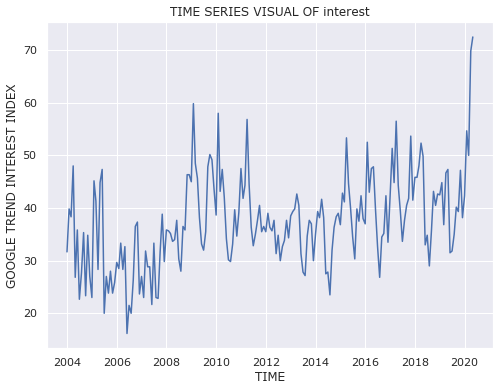

In [16]:
nice_plot(master, 'interest')

In [63]:
# master.to_csv('master_series.csv')

In [17]:
gen_dftest(master, 'interest')

Test Stat                -0.959342
P-Value                   0.767803
# Lags                   14.000000
# Observations          182.000000
Critical Value (1%)      -3.466800
Critical Value (5%)      -2.877555
Critical Value (10%)     -2.575308
dtype: float64

The data that I have compiled, top five related terms to **indoor farming**, is not a stationary time series.

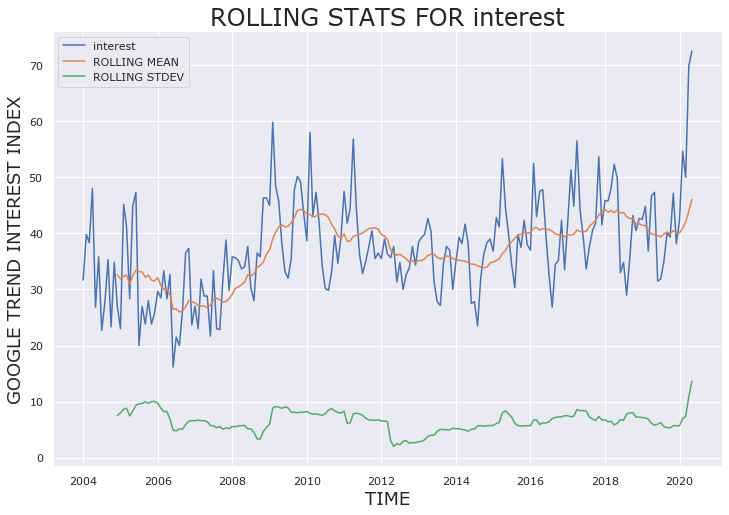

In [18]:
rolling_stats(master, 'interest', 12)

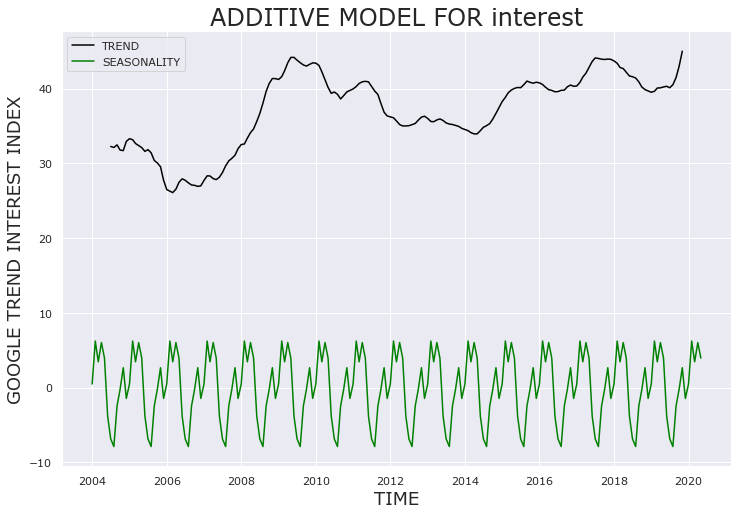

In [19]:
szn_decomp(master, 'interest', model=['additive'],
           graphs=['trend', 'szn'])

Quite a bit of seasonality in this data. Will be taking this into consideration as I converge on a final model.

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

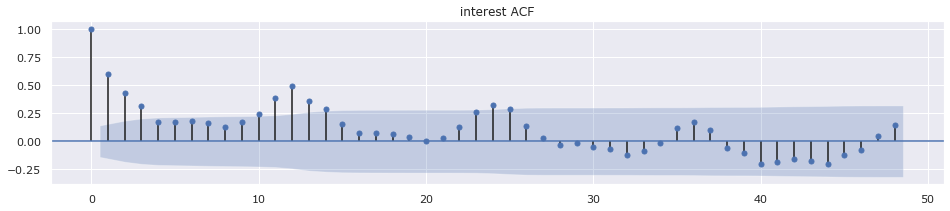

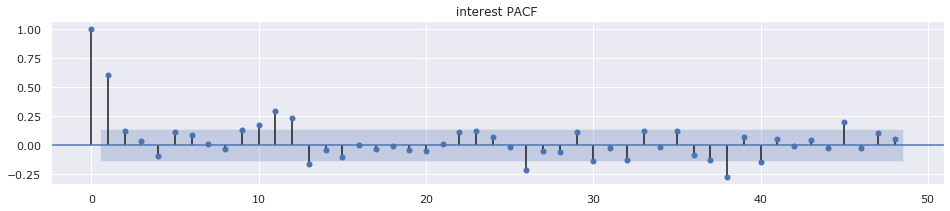

In [20]:
auto_corrs(master, 'interest')

Due to the seasonality of this data, I am going to make a preliminary model with parameters loosely based on the previous EDA.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -208.836
Date:                            Mon, 18 May 2020   AIC                            429.671
Time:                                    13:16:17   BIC                            441.715
Sample:                                01-01-2004   HQIC                           434.329
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0002      0.009     -0.022      0.983      -0.018       0.017
ar.L1          0.3991      0.212   

Text(0.5, 1.0, 'SARIMA MODEL')

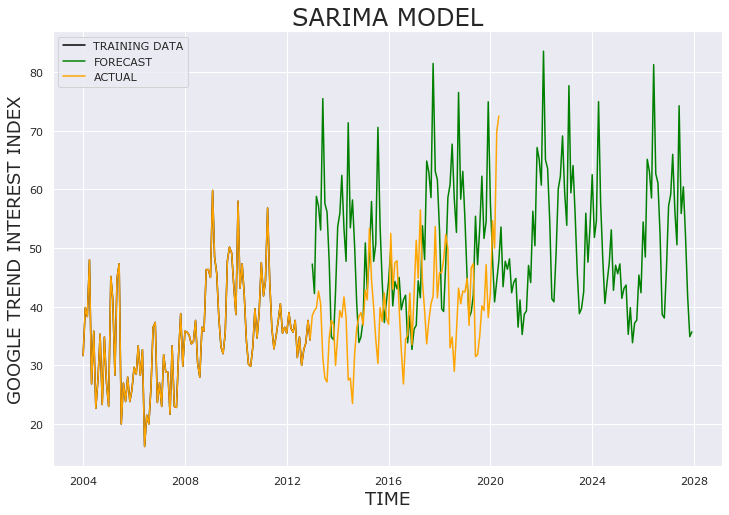

In [22]:
model = SARIMAX(master['2000':'2012'], order=(1,1,1), seasonal_order=(1, 1, 1, 52),
                trend='t')
fit = model.fit()
print(fit.summary())
forecast = fit.forecast(180)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2000':'2012'].index,
             y=master['2000':'2012']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  429.67123506765455
This model's BIC score is:  441.7152341790494
This model's RMSE on test data is:  10.640107890571427


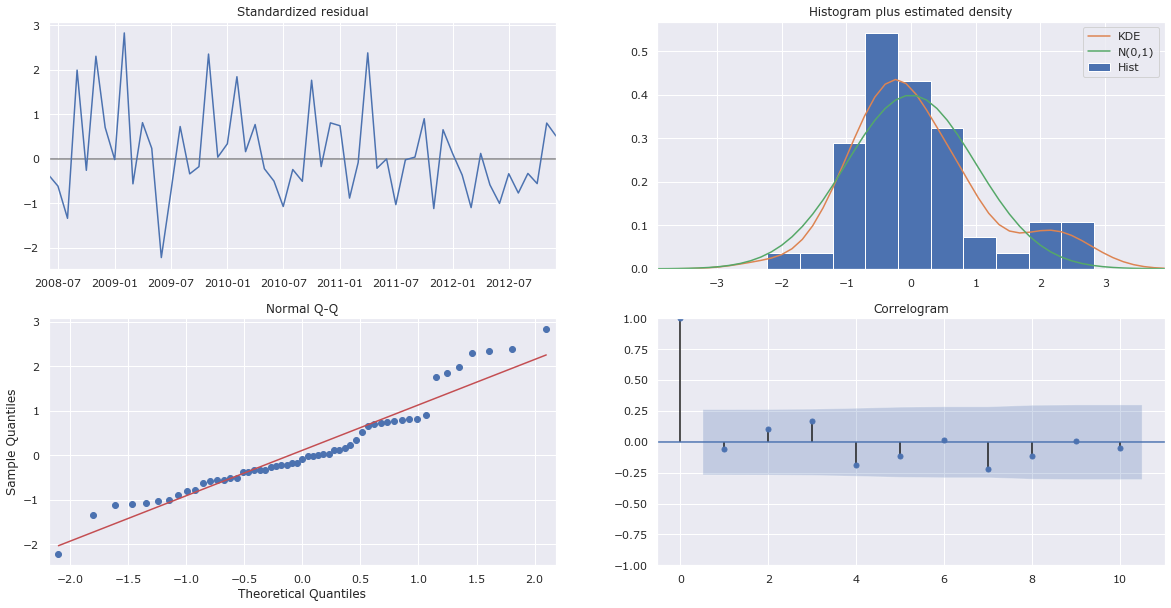

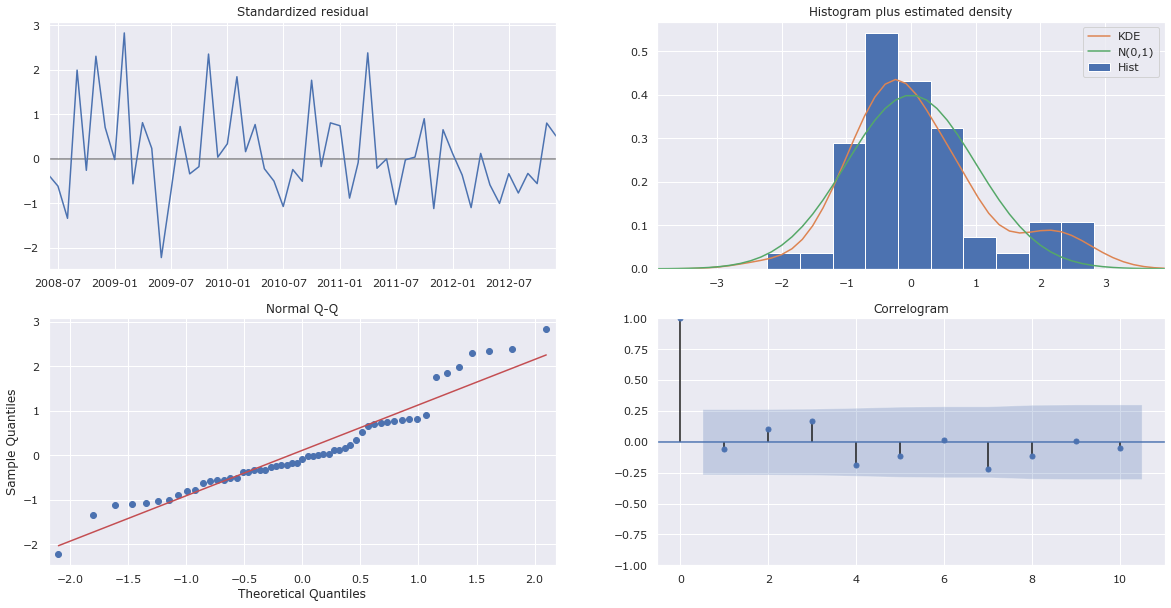

In [23]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Now going to try a model that has no AR, MA, or seasonal components other than differencing.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -216.864
Date:                            Mon, 18 May 2020   AIC                            437.728
Time:                                    13:19:12   BIC                            441.743
Sample:                                01-01-2004   HQIC                           439.281
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.024      0.008      0.993      -0.048       0.048
sigma2       155.7197     30.872   

Text(0.5, 1.0, 'SARIMA MODEL')

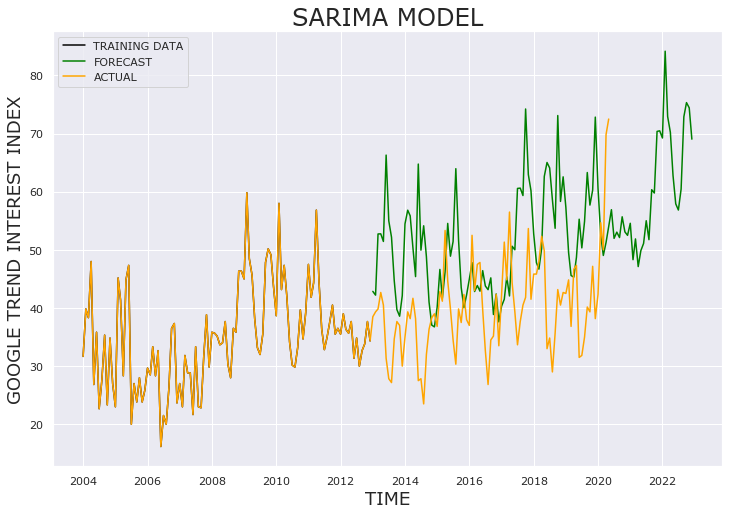

In [24]:
model2 = SARIMAX(master['2000':'2012'], order=(0,1,0), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model2.fit()
print(fit.summary())
forecast = fit.forecast(120)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2000':'2012'].index,
             y=master['2000':'2012']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  437.72826714945654
This model's BIC score is:  441.7429335199215
This model's RMSE on test data is:  11.500076517288221


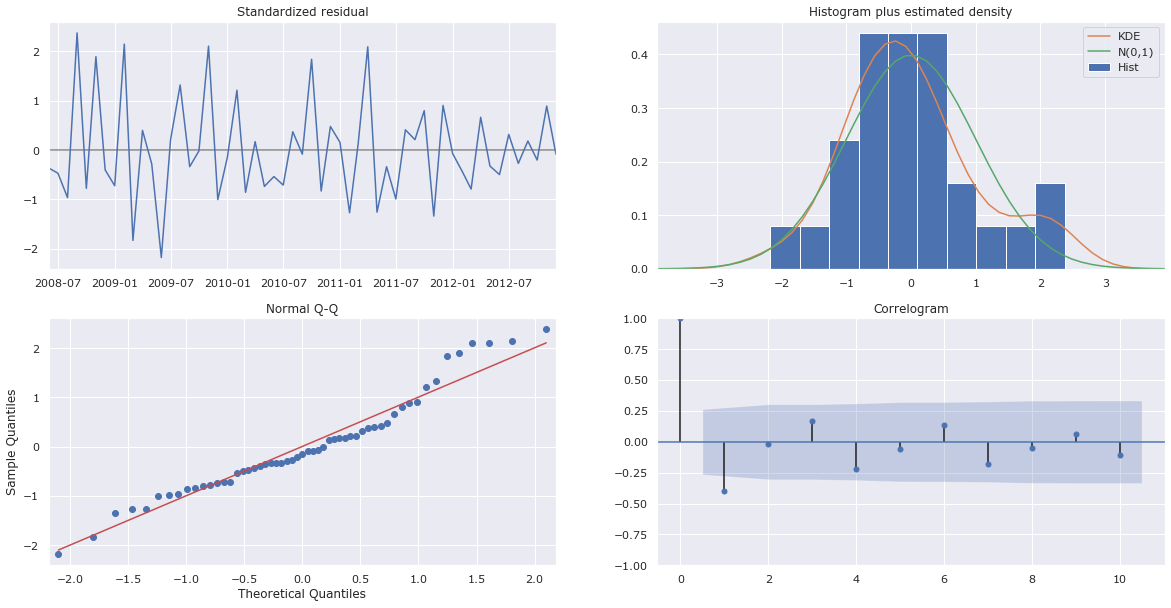

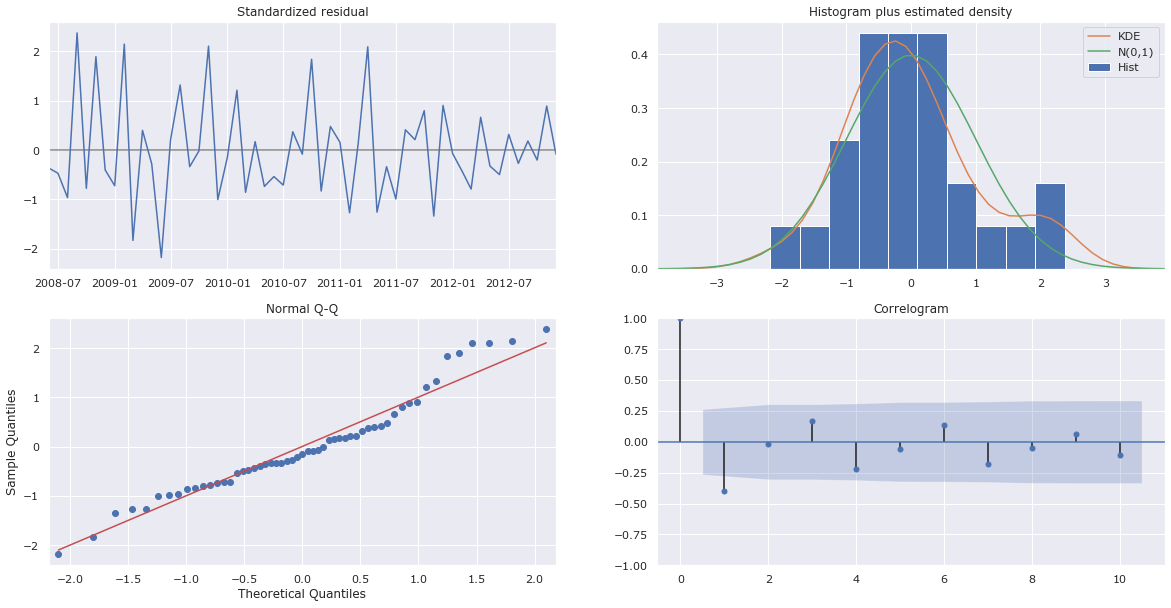

In [25]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Lower AIC/BIC but slightly higher RMSE.

Now to use `auto_arima` to find the best params for final model.

In [26]:
# Searching for best params
model3 = auto_arima(master['2000':'2012'], trace=True, start_p=0, start_q=0,
                  start_P=0, start_Q=0, seasonal=True, m=52, suppress_warnings=True, 
                   D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model3.fit(master['2000':'2012'], disp=0)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=435.460, BIC=439.511, Time=0.216 seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=429.063, BIC=437.164, Time=7.582 seconds
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=431.379, BIC=439.480, Time=11.879 seconds
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=459.154, BIC=461.179, Time=0.358 seconds
Fit ARIMA(1,0,0)x(0,1,0,52) [intercept=True]; AIC=427.364, BIC=433.441, Time=1.085 seconds
Fit ARIMA(1,0,0)x(0,1,1,52) [intercept=True]; AIC=429.063, BIC=437.164, Time=8.392 seconds
Fit ARIMA(1,0,0)x(1,1,1,52) [intercept=True]; AIC=431.063, BIC=441.189, Time=9.394 seconds
Fit ARIMA(2,0,0)x(0,1,0,52) [intercept=True]; AIC=428.177, BIC=436.279, Time=2.089 seconds
Fit ARIMA(1,0,1)x(0,1,0,52) [intercept=True]; AIC=428.467, BIC=436.569, Time=2.171 seconds
Fit ARIMA(0,0,1)x(0,1,0,52) [intercept=True]; AIC=429.954, BIC=436.030, Time=2.043 seconds
Fit ARIMA(2,0,1)x(0,1,0,52) [intercept=True];

In [27]:
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))



The best order parameters are (1, 0, 0),(0, 1, 0, 52)



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  108
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                -211.224
Date:                            Mon, 18 May 2020   AIC                            428.449
Time:                                    13:22:26   BIC                            434.525
Sample:                                01-01-2004   HQIC                           430.804
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0581      0.025      2.347      0.019       0.010       0.107
ar.L1          0.4309      0.154   

Text(0.5, 1.0, 'SARIMA MODEL')

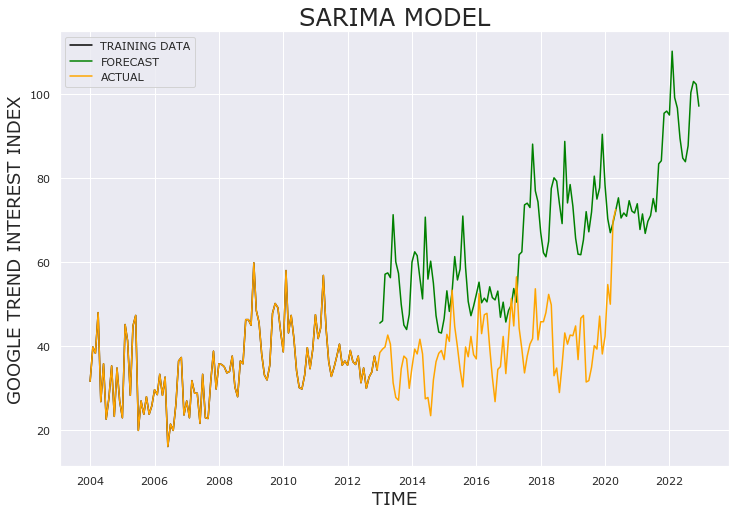

In [28]:
model4 = SARIMAX(master['2000':'2012'], order=(1,0,0), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model4.fit()
print(fit.summary())
forecast = fit.forecast(120)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2000':'2012'].index,
             y=master['2000':'2012']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

How about RMSE?

This model's AIC score is:  428.4486874926289
This model's BIC score is:  434.52474256483436
This model's RMSE on test data is:  21.490168134339203


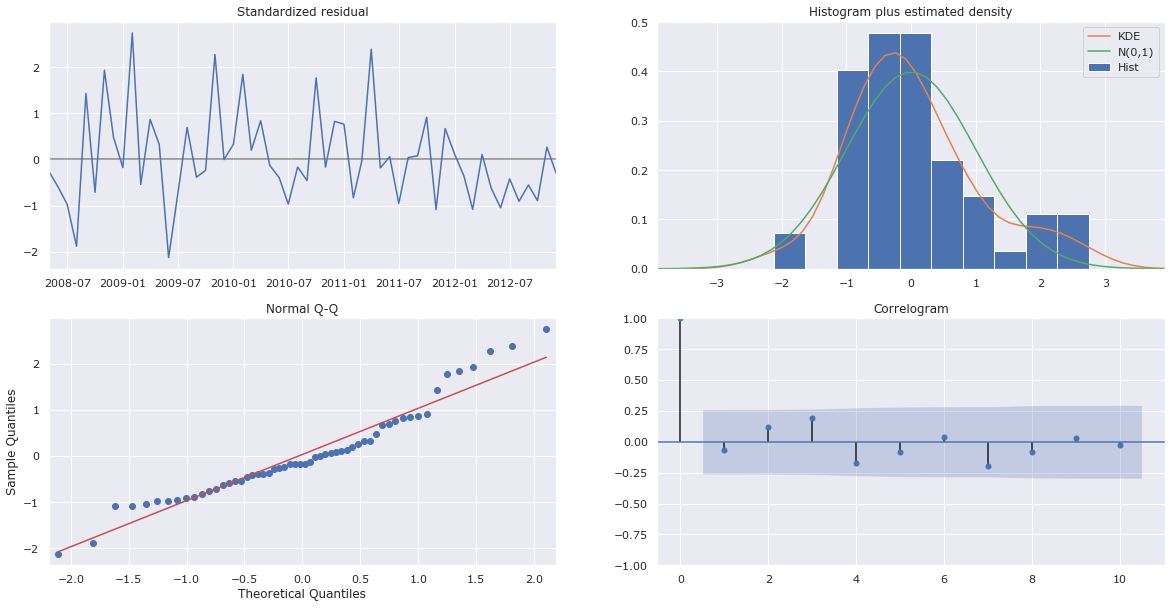

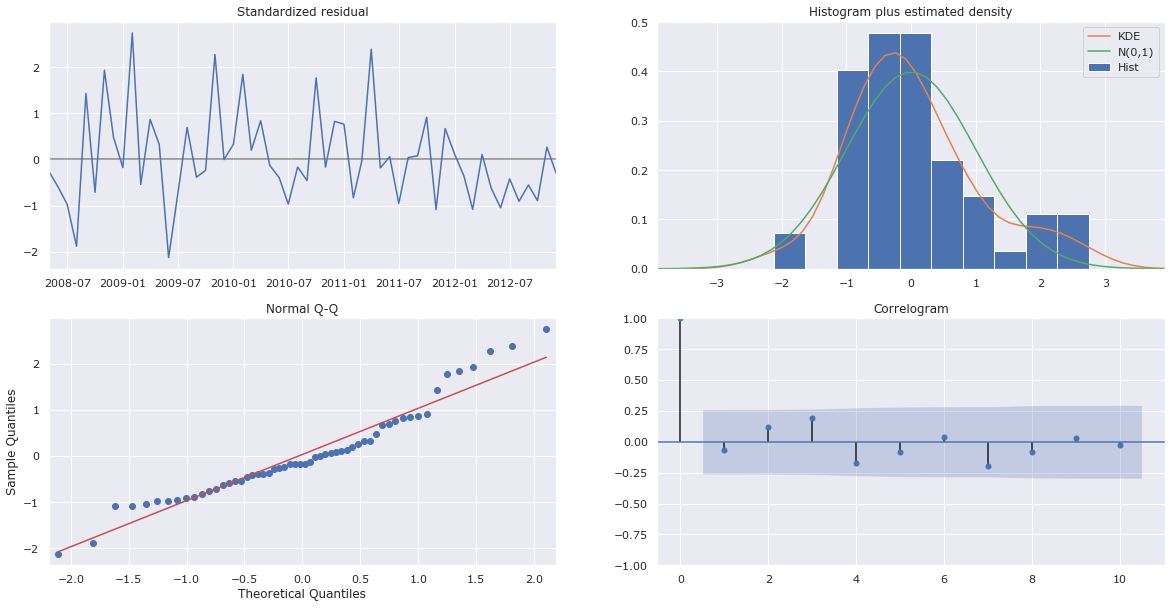

In [29]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Although AIC is minimized compared to the other model, the BIC and RMSE is higher. It is less accurate, and in regards to the graphical forecast, doesn't follow the test data well.  
  
Going to re-initialize the `auto_arima` but this time with default ARMA parameters. I want to minimize AIC, but I also want to have an accurate model. Will try to balance.

In [30]:
model5 = auto_arima(master['2000':'2012'], trace=True, seasonal=True, m=52, suppress_warnings=True,
                    D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model5.fit(master['2000':'2012'], disp=0)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,52) [intercept=True]; AIC=433.591, BIC=449.794, Time=24.014 seconds
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=435.460, BIC=439.511, Time=0.481 seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=429.063, BIC=437.164, Time=9.207 seconds
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=431.379, BIC=439.480, Time=13.628 seconds
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=459.154, BIC=461.179, Time=0.367 seconds
Fit ARIMA(1,0,0)x(0,1,0,52) [intercept=True]; AIC=427.364, BIC=433.441, Time=1.178 seconds
Fit ARIMA(1,0,0)x(0,1,1,52) [intercept=True]; AIC=429.063, BIC=437.164, Time=9.294 seconds
Fit ARIMA(1,0,0)x(1,1,1,52) [intercept=True]; AIC=431.063, BIC=441.189, Time=10.342 seconds
Fit ARIMA(2,0,0)x(0,1,0,52) [intercept=True]; AIC=428.177, BIC=436.279, Time=2.250 seconds
Fit ARIMA(1,0,1)x(0,1,0,52) [intercept=True]; AIC=428.467, BIC=436.569, Time=2.503 seconds
Fit ARIMA(0,0,1)x(0,1,0,52) [intercept=True

In [31]:
fitted.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

No difference. Going to initialize a starting d=1

In [32]:
model6 = auto_arima(master['2000':'2012'], trace=True, d=1, seasonal=True, m=52, suppress_warnings=True,
                    D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model6.fit(master['2000':'2012'], disp=0)
fitted.get_params()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,1,1,52) [intercept=True]; AIC=434.851, BIC=450.910, Time=51.439 seconds
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=True]; AIC=437.726, BIC=441.741, Time=0.714 seconds
Fit ARIMA(1,1,0)x(1,1,0,52) [intercept=True]; AIC=430.349, BIC=438.378, Time=12.677 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,1)x(0,1,1,52) [intercept=True]; AIC=428.790, BIC=436.820, Time=33.272 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=False]; AIC=435.728, BIC=437.736, Time=1.071 seconds
Fit ARIMA(2,1,2)x(0,1,1,52) [intercept=True]; AIC=433.480, BIC=447.531, Time=59.646 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 52); setting score to inf (at lea

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                      
Dep. Variable:                            interest   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 52)   Log Likelihood                -208.762
Date:                             Mon, 18 May 2020   AIC                            425.525
Time:                                     13:35:01   BIC                            433.554
Sample:                                 01-01-2004   HQIC                           428.630
                                      - 12-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0006      0.003     -0.191      0.848      -0.006       0.005
ar.L1          0.4191      

Text(0.5, 1.0, 'SARIMA MODEL (1,1,1)x(0,1,0,52)')

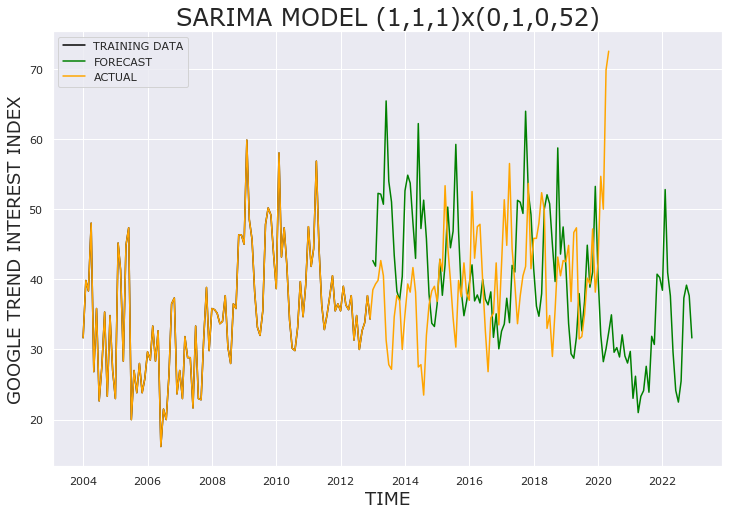

In [33]:
model7 = SARIMAX(master['2000':'2012'], order=(1,1,1), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model7.fit()
print(fit.summary())
forecast = fit.forecast(120)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2000':'2012'].index,
             y=master['2000':'2012']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST','ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL (1,1,1)x(0,1,0,52)', size=24)

This model's AIC score is:  152.82585306898284
This model's BIC score is:  154.7147310273157
This model's RMSE on test data is:  10.11773472300625


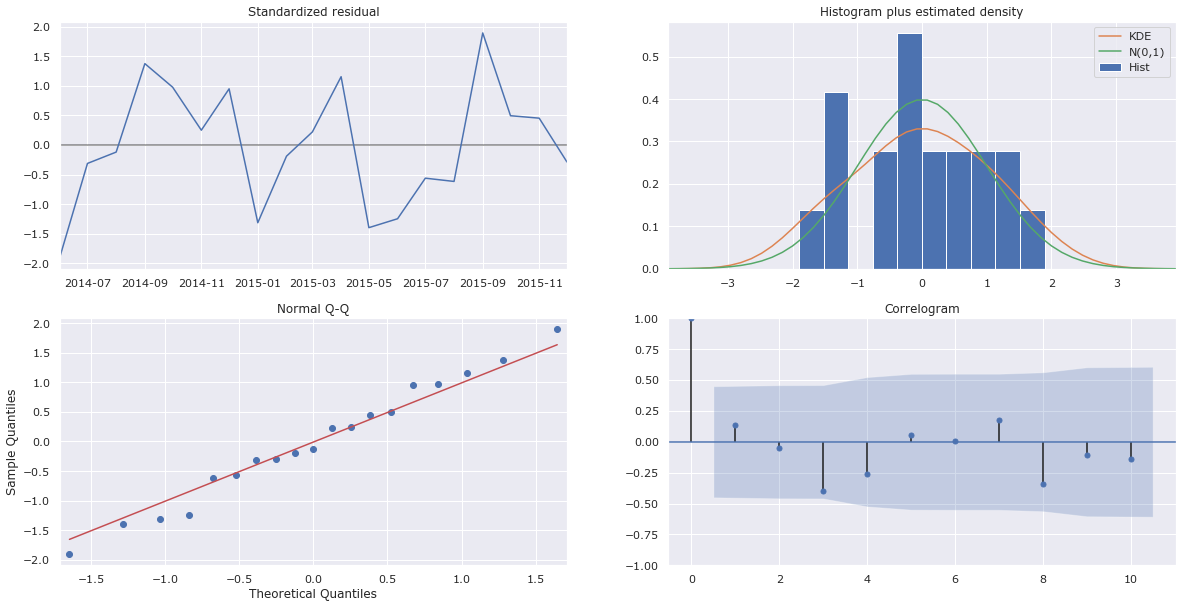

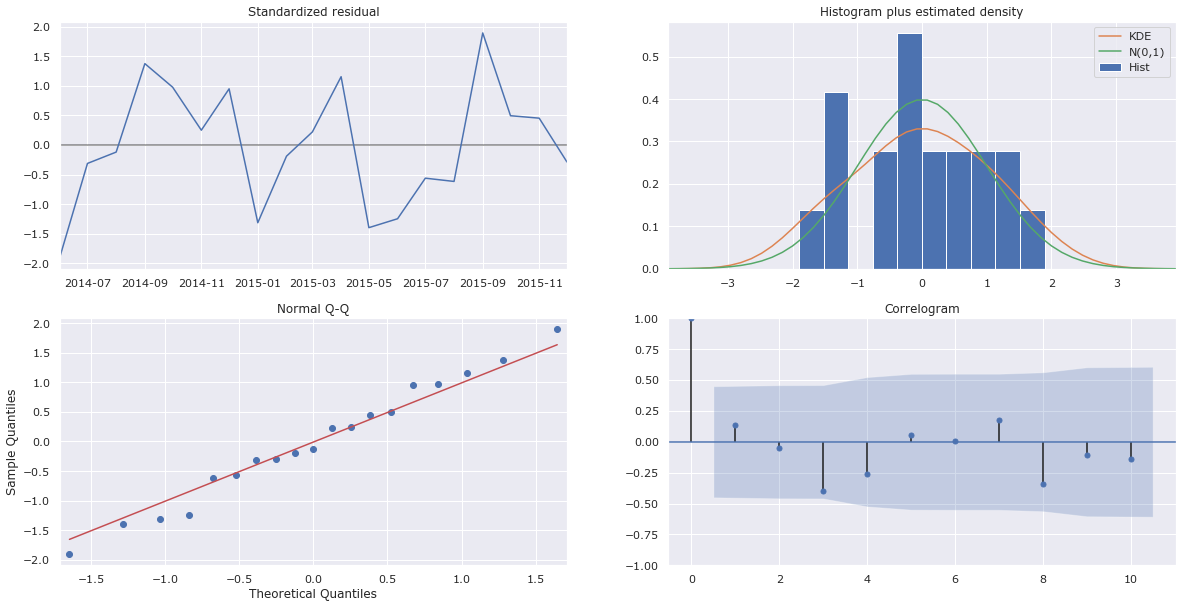

In [84]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

### Final model parameters (0,1,0)x(0,1,0,52)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -216.864
Date:                            Mon, 18 May 2020   AIC                            437.728
Time:                                    13:40:55   BIC                            441.743
Sample:                                01-01-2004   HQIC                           439.281
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.024      0.008      0.993      -0.048       0.048
sigma2       155.7197     30.872   

Text(0.5, 1.0, 'SARIMA MODEL (0,1,0)x(0,1,0,52)')

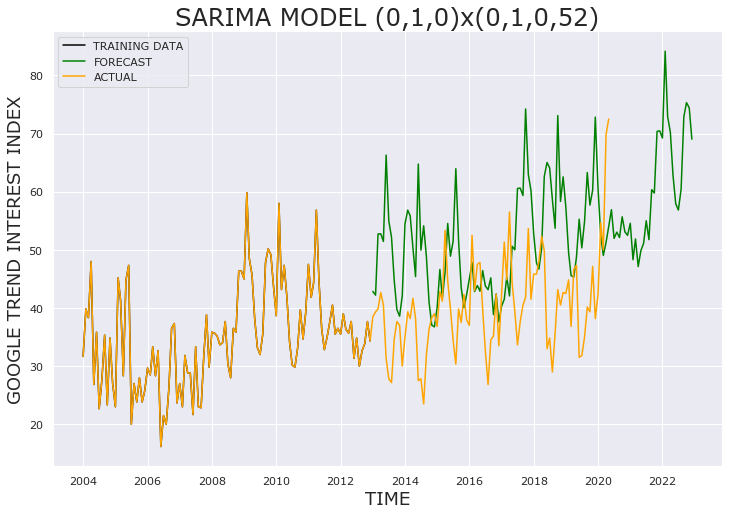

In [34]:
model8 = SARIMAX(master['2000':'2012'], order=(0,1,0), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model8.fit()
print(fit.summary())
forecast = fit.forecast(120)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2000':'2012'].index,
             y=master['2000':'2012']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST','ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL (0,1,0)x(0,1,0,52)', size=24)

This model's AIC score is:  437.72826714945654
This model's BIC score is:  441.7429335199215
This model's RMSE on test data is:  11.500076517288221


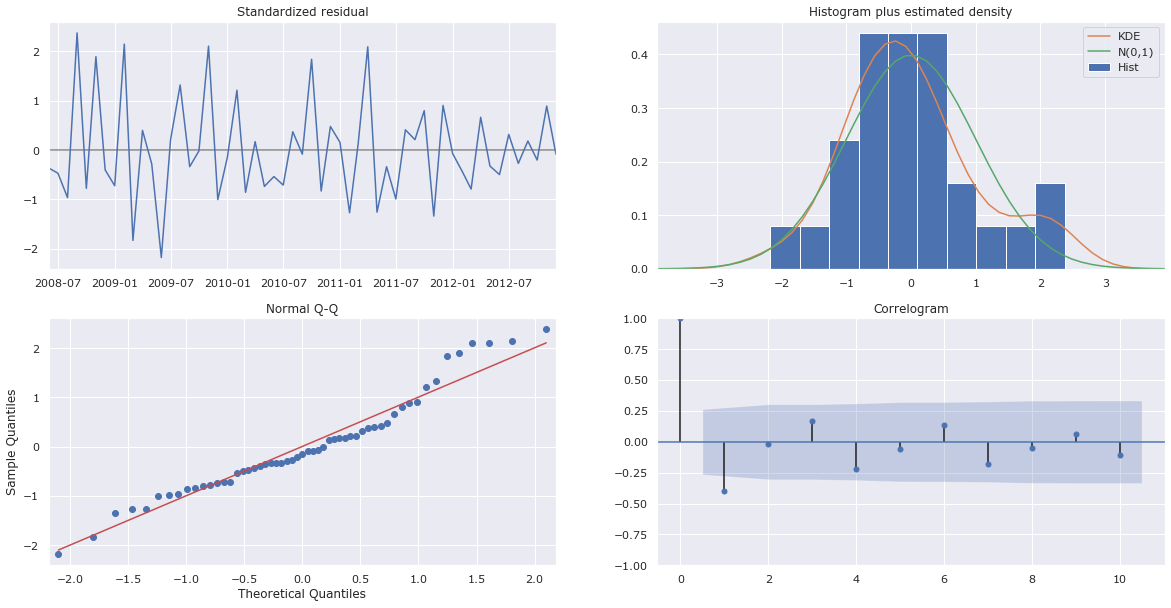

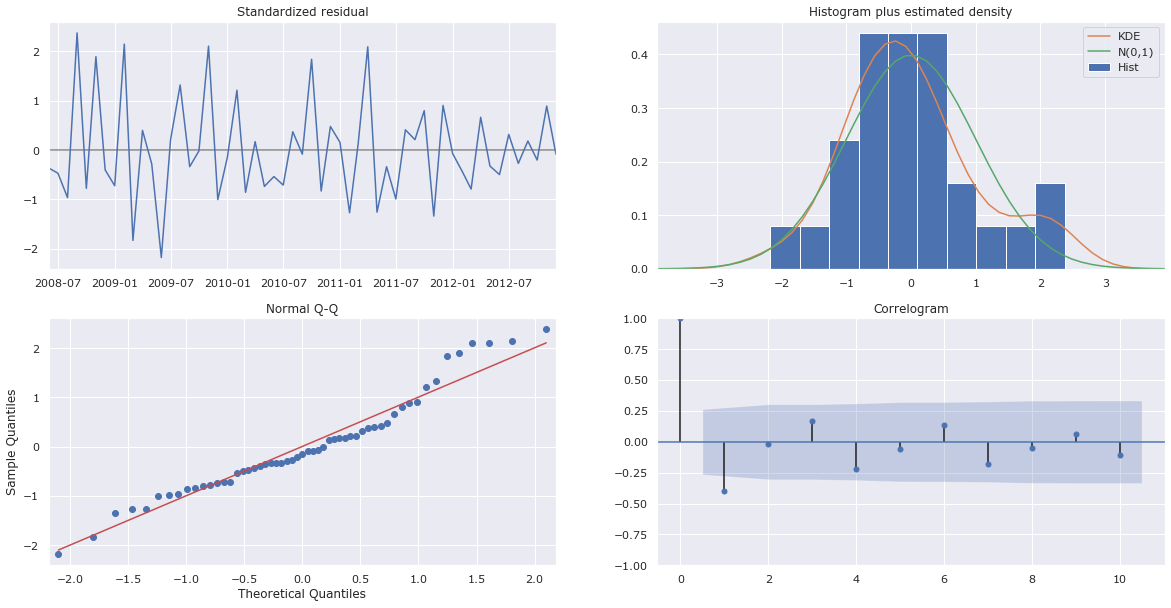

In [36]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Forecasting 108 months into the future from the
training data (2016-2025).
...
...


Text(0.5, 1.0, 'SARIMA MODEL PREDICTIONS THROUGH 2025')

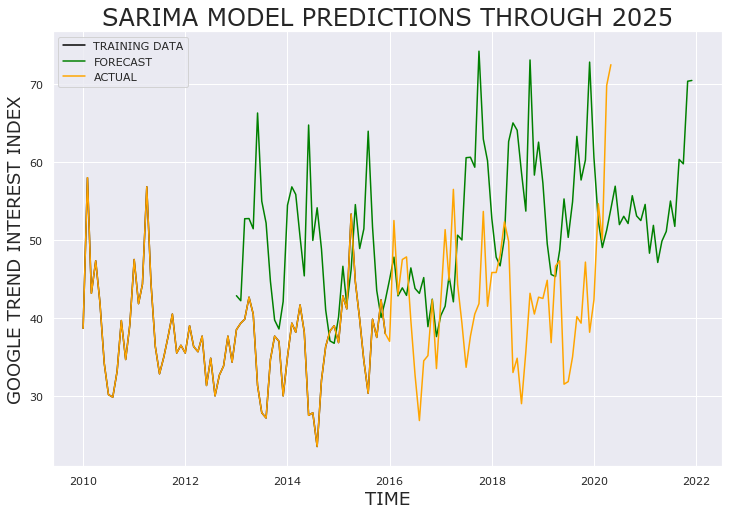

In [35]:
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2016-2025).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL PREDICTIONS THROUGH 2025', size=24)

---

---

# LSTM Modeling